<a href="https://colab.research.google.com/github/amit7207/Internship-project/blob/main/BANK_CUSTOMER_CHURN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANK CUSTOMER CHURN PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DATASET/Bank Churn Modelling (1).csv')

In [ ]:
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
dataset=dataset.drop(['CustomerId','Surname'],axis=1)

In [ ]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       10000 non-null  int64  
 1   Geography         10000 non-null  object 
 2   Gender            10000 non-null  object 
 3   Age               10000 non-null  int64  
 4   Tenure            10000 non-null  int64  
 5   Balance           10000 non-null  float64
 6   Num Of Products   10000 non-null  int64  
 7   Has Credit Card   10000 non-null  int64  
 8   Is Active Member  10000 non-null  int64  
 9   Estimated Salary  10000 non-null  float64
 10  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

# **Using one-Hot encoding**
A popular technique used in data processing to represent categorical variables or features as binary vectors.

In [ ]:
dataset=pd.get_dummies(dataset,drop_first=True)

# **Multicollinearity**
Two or more independent variables having an exact linear relationship between them.

In [ ]:
dataset

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


<Axes: ylabel='Frequency'>

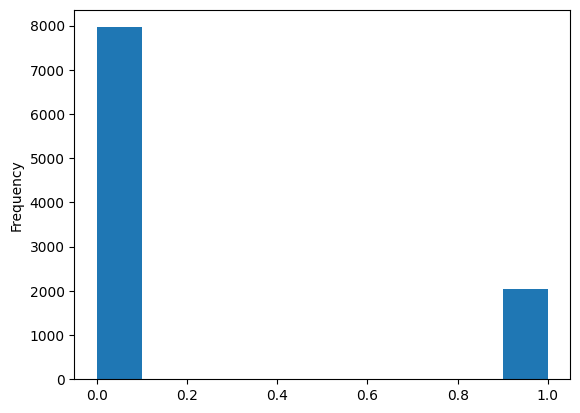

In [ ]:
dataset.Churn.plot.hist()

In [ ]:
(dataset.Churn==1).sum()

2037

In [ ]:
dataset_2=dataset.drop('Churn',axis=1)

<Axes: title={'center': 'correlated with Churn column'}>

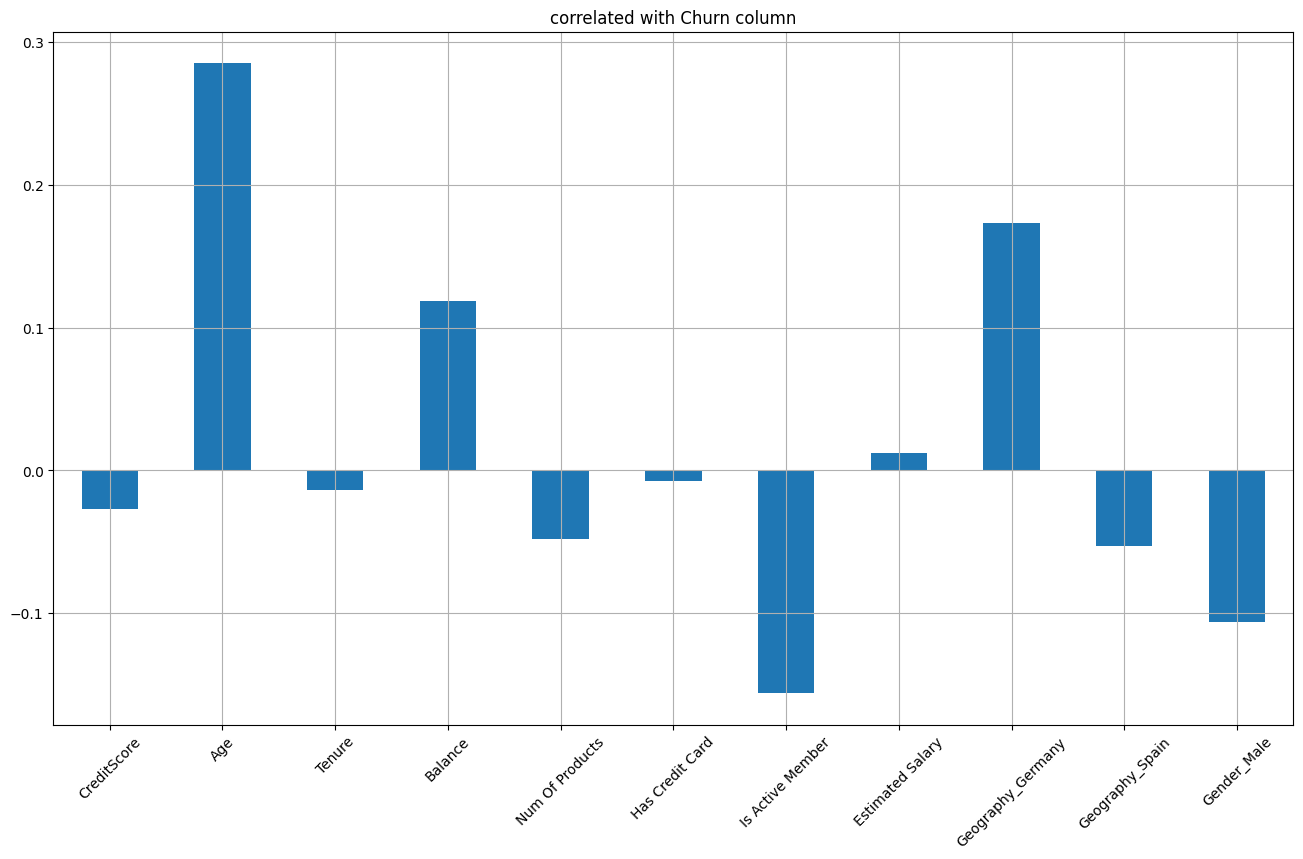

In [ ]:
dataset_2.corrwith(dataset['Churn']).plot.bar(figsize=(16,9),title='correlated with Churn column',rot=45,grid=True)

In [ ]:
corr=dataset.corr()

<Axes: >

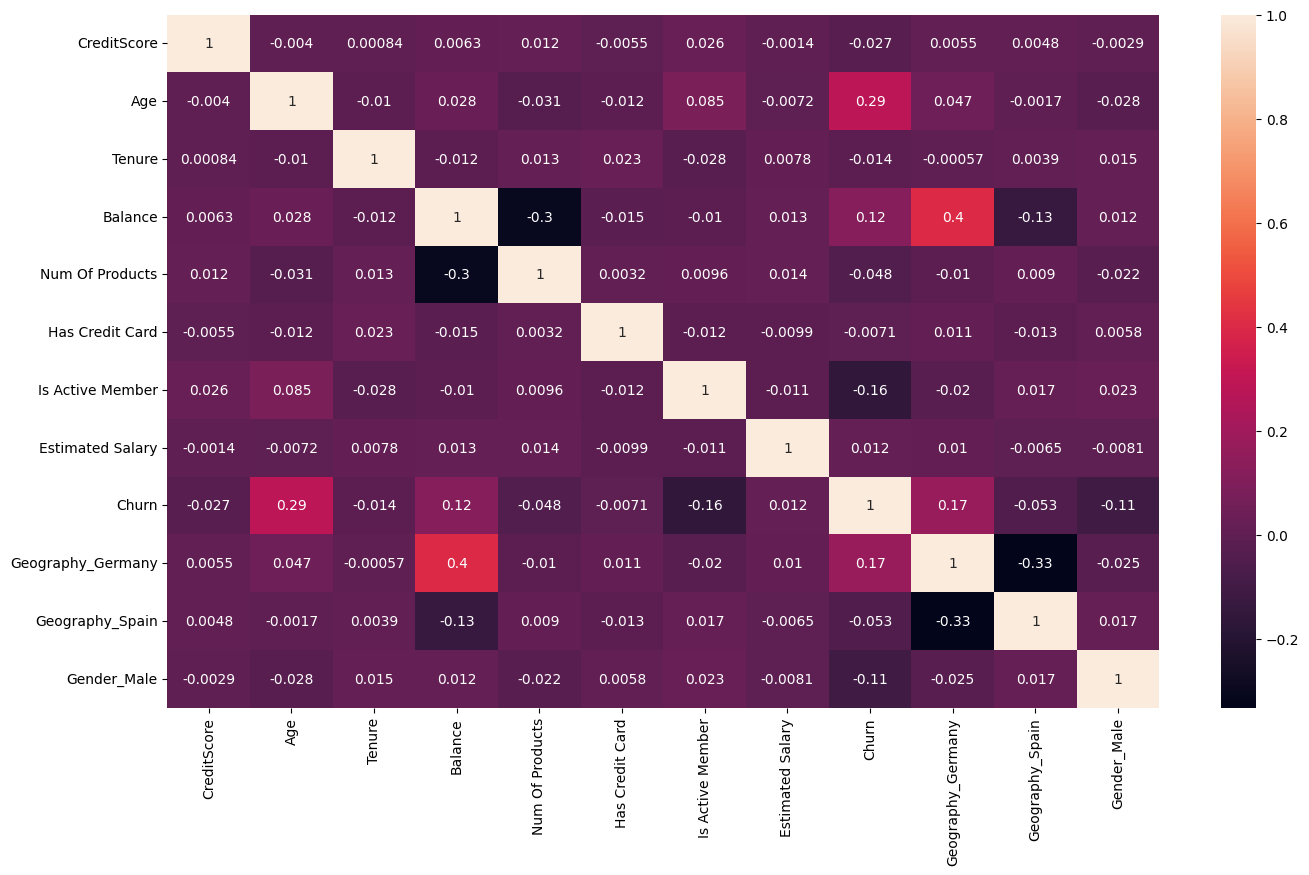

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [ ]:
x=dataset.drop('Churn',axis=1)
y=dataset['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
x_test.shape

(2000, 11)

# **StandardScaler**
Technique for standardizing or scaling numerical features before fitting a model.It transform the data by subtracting the mean and dividing by standard deviation resulting in a distribution of a 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

## **Logistic Regression**
Used for predicting the categorical dependent variable using a given set of independent variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0).fit(x_train,y_train)


In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [ ]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [ ]:
results=pd.DataFrame([['Logistic Regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1526   69]
 [ 309   96]]


## **Random Forest**
It is a classifier that contains a number of decision trees on various subsets of the given dataset and it takes the average to improve the predictive accuracy of the dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=0).fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
RF_results=pd.DataFrame([['Random Forest Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])
results,RF_results

(                 Model  Accuracy  F1 Score  Precision    Recall
 0  Logistic Regression     0.811  0.336842   0.581818  0.237037,
                       Model  Accuracy  F1 Score  Precision    Recall
 0  Random Forest Classifier     0.867  0.613372   0.745583  0.520988)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1523   72]
 [ 194  211]]


In [ ]:
dataset.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
single_obs=[[647,40,3,85000.45,2,0,0,92012.45,0,1,1]]
clf.predict(sc.fit_transform(single_obs))

array([0])